In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Instala e importa biblioteca para baixar do Drive
!pip install -q gdown
import gdown
import pandas as pd
import os

# --- CONFIGURAÇÃO DOS ARQUIVOS (PREENCHA AQUI!) ---
# Coloque o nome que você quer dar ao arquivo e o ID DO GOOGLE DRIVE dele.
# O ID é a parte do link entre "/d/" e "/view".
arquivos_drive = {
    # Exemplo: 'INFLUD19.csv': '1A2b3C4d5E6f7G8h9I0j',
    'INFLUD19.csv': '1IFhGC1scJyRSQ9zqHAgnD6qQO75SbDyP',
    'INFLUD20.csv': '18BUSPeHeziHwXB40yiI0ZooToHkoQnrP',
    'INFLUD21.csv': '1wcwQjlt6Mwny131S4rnL2bExrRAu6Wxy',
    'INFLUD22.csv': '1O0J5MxzqN7WXBqvw2f5_ZCnbDcH9Avr5',
    'INFLUD23.csv': '1aidVKvuO3y55_nVEeq681w0A3_fFfTOI',
    'INFLUD24.csv': '1IyVrsKvYaRuutwriJVoVfucjm8pMPmDi',
    'INFLUD25.csv': '1nGXOcJ8VoyaxJ9AI05fCs3fSOhf-p4kH'
}

lista_dfs = []

print("--- INICIANDO DOWNLOAD E LEITURA DOS DADOS ---\n")

for nome_arquivo, file_id in arquivos_drive.items():
    # Pula se você não tiver preenchido o ID ainda
    if 'COLE_O_ID' in file_id:
        print(f"⚠️ Pulei {nome_arquivo}: ID não preenchido no código.")
        continue

    print(f"Baixando: {nome_arquivo}...")
    try:
        # 1. Baixa o arquivo do Drive para o Colab temporariamente
        url = f'https://drive.google.com/uc?id={file_id}'
        gdown.download(url, nome_arquivo, quiet=False)

        # 2. Lê o arquivo baixado (Mantendo suas configurações originais)
        print(f"Lendo CSV...")
        df_temp = pd.read_csv(
            nome_arquivo,
            sep=';',
            encoding='latin1',
            low_memory=False,
            # Mantendo exatamente as suas colunas
            usecols=['CLASSI_FIN', 'DT_ENCERRA', 'EVOLUCAO', 'ASMA', 'FEBRE',
                     'DISPNEIA', 'SATURACAO', 'TOSSE', 'RAIOX_RES', 'NU_IDADE_N',
                     'TP_IDADE', 'CS_SEXO', 'DT_SIN_PRI', 'DT_INTERNA', 'DT_NOTIFIC',
                     'CO_MUN_RES', 'ID_MN_RESI']
        )
        lista_dfs.append(df_temp)

        # (Opcional) Remove o arquivo CSV do disco para liberar espaço na RAM do Colab
        os.remove(nome_arquivo)

    except Exception as e:
        print(f"❌ Erro ao processar {nome_arquivo}: {e}")
        print("Dica: Verifique se o ID está correto e se o arquivo está compartilhado como Público.")

# --- CONCATENAÇÃO ---
if len(lista_dfs) > 0:
    # Junta todos os pedaços em um único DataFrame chamado 'df'
    df = pd.concat(lista_dfs, axis=0, ignore_index=True)
    print(f"\n✅ SUCESSO! Todos os arquivos baixados foram unidos.")
    print(f"Total de linhas (pacientes): {len(df)}")
    print(f"Total de colunas: {len(df.columns)}")
    display(df.head())
else:
    print("\n❌ Nenhum arquivo foi carregado. Verifique os IDs no código.")

Encontrei 7 arquivos: ['/content/drive/MyDrive/Base de dados/INFLUD19-26-06-2025.csv', '/content/drive/MyDrive/Base de dados/INFLUD24-26-06-2025.csv', '/content/drive/MyDrive/Base de dados/INFLUD25-24-11-2025.csv', '/content/drive/MyDrive/Base de dados/INFLUD23-26-06-2025.csv', '/content/drive/MyDrive/Base de dados/INFLUD20-26-06-2025.csv', '/content/drive/MyDrive/Base de dados/INFLUD22-26-06-2025.csv', '/content/drive/MyDrive/Base de dados/INFLUD21-26-06-2025.csv']
Lendo: /content/drive/MyDrive/Base de dados/INFLUD19-26-06-2025.csv...
Lendo: /content/drive/MyDrive/Base de dados/INFLUD24-26-06-2025.csv...
Lendo: /content/drive/MyDrive/Base de dados/INFLUD25-24-11-2025.csv...
Lendo: /content/drive/MyDrive/Base de dados/INFLUD23-26-06-2025.csv...
Lendo: /content/drive/MyDrive/Base de dados/INFLUD20-26-06-2025.csv...
Lendo: /content/drive/MyDrive/Base de dados/INFLUD22-26-06-2025.csv...
Lendo: /content/drive/MyDrive/Base de dados/INFLUD21-26-06-2025.csv...

SUCESSO! Todos os arquivos fora

,DT_NOTIFIC,DT_SIN_PRI,CS_SEXO,NU_IDADE_N,TP_IDADE,ID_MN_RESI,CO_MUN_RES,FEBRE,TOSSE,DISPNEIA,SATURACAO,ASMA,DT_INTERNA,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DT_ENCERRA
0,2019-01-10,2019-01-06,M,30,3,RIBEIRAO DAS NEVES,315460.0,1.0,1.0,1.0,1.0,NaN,2019-01-06,5.0,4.0,1.0,2019-02-15
1,2019-01-03,2019-01-01,F,7,2,SAO PAULO,355030.0,1.0,1.0,1.0,1.0,NaN,2019-01-01,2.0,4.0,1.0,2019-01-21
2,2019-01-02,2018-12-31,M,1,3,GOIANA,260620.0,1.0,1.0,1.0,1.0,NaN,2019-01-02,1.0,4.0,1.0,2019-05-31
3,2019-01-10,2019-01-07,F,5,2,CAMPINAS,350950.0,1.0,1.0,1.0,1.0,NaN,2019-01-10,2.0,2.0,1.0,2019-02-04
4,2019-01-11,2019-01-06,F,3,2,BELO JARDIM,260170.0,1.0,2.0,1.0,1.0,NaN,2019-01-13,NaN,4.0,2.0,2019-05-21


Identificar valores ausentes


1. ANÁLISE DE VALORES AUSENTES
Valores vazios (NaN) na coluna ASMA: 2835529
Valores preenchidos como 'Ignorado' (9) na coluna ASMA: 32117


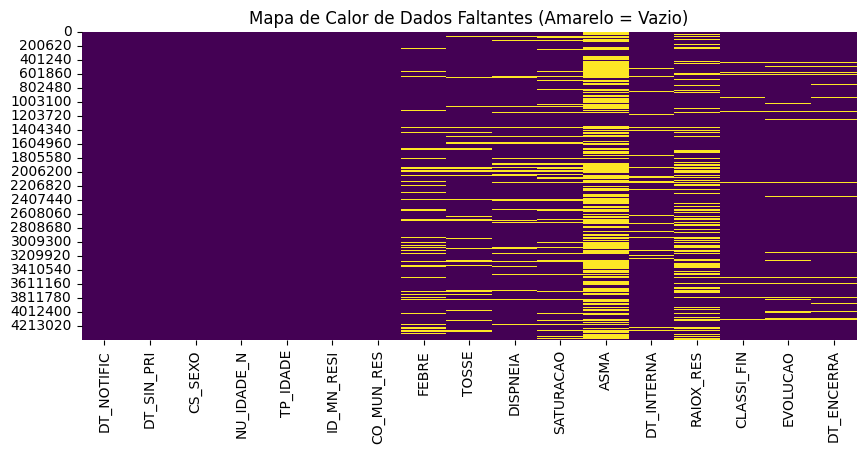


Porcentagem de nulos por coluna:
 ID_MN_RESI     0.017627
CO_MUN_RES     0.017627
FEBRE         15.285177
TOSSE         11.430503
DISPNEIA      12.504563
SATURACAO     16.673785
ASMA          64.244843
DT_INTERNA     6.577127
RAIOX_RES     37.252361
CLASSI_FIN     3.817720
EVOLUCAO       7.393893
DT_ENCERRA     7.120739
dtype: float64


In [ ]:
print("\n1. ANÁLISE DE VALORES AUSENTES")

# 1. Contagem de nulos técnicos (NaN)
nulos = df.isnull().sum()
print(f"Valores vazios (NaN) na coluna ASMA: {nulos['ASMA']}")

# 2. Contagem de 'Ignorados' (Código 9) - Comum no SIVEP
# Precisamos garantir que estamos contando 9 numérico ou '9' string
ignorados_asma = df[df['ASMA'].isin([9, '9'])].shape[0]
print(f"Valores preenchidos como 'Ignorado' (9) na coluna ASMA: {ignorados_asma}")

# Dica: Verifique a porcentagem de falhas
percentual_nulos = (df.isnull().sum() / len(df)) * 100
print("\nPorcentagem de nulos por coluna:\n", percentual_nulos[percentual_nulos > 0])

Limpeza de valores ausentes

In [ ]:
# 1. Criar uma cópia segura para não alterar o original carregado
df_clean = df.copy()
print(f"Total de registros antes da limpeza: {len(df_clean)}")

# 2. REMOÇÃO: Linhas sem Desfecho ou Classificação Final
# Se não sabemos se o paciente morreu ou qual vírus ele teve, o dado é inútil para o modelo.
cols_essenciais = ['CLASSI_FIN', 'EVOLUCAO']
df_clean = df_clean.dropna(subset=cols_essenciais)
print(f"Registros após remover alvos vazios: {len(df_clean)}")

# REMOVER NaN DA COLUNA ASMA (NOVO PASSO - SOLICITADO PELO USUÁRIO)
initial_asma_nan_rows = len(df_clean)
df_clean = df_clean.dropna(subset=['ASMA'])
print(f"Registros após remover valores NaN na coluna 'ASMA': {len(df_clean)} (removidos: {initial_asma_nan_rows - len(df_clean)})\n")


# 3. IMPUTAÇÃO (PREENCHIMENTO) e REMOÇÃO: Comorbidades (Diabetes, etc. - ASMA foi tratado separadamente)
# Lógica: No formulário médico, campo vazio geralmente significa "Não tem".
# Vamos preencher NaN com 2.0 (Código para "Não")
# 'ASMA' foi removida desta lista pois será tratada com remoção de linhas.
cols_risco_imputar = ['CARDIOPATI', 'DIABETES', 'OBESIDADE'] # Removido ASMA

for col in cols_risco_imputar:
    if col in df_clean.columns:
        # Preenche vazios com 2 (Não)
        df_clean[col] = df_clean[col].fillna(2.0)

# Remover linhas onde ASMA é 'Ignorado' (9.0) - Mantido conforme solicitação anterior do usuário
if 'ASMA' in df_clean.columns:
    initial_asma_9_rows = len(df_clean)
    df_clean = df_clean[df_clean['ASMA'] != 9.0]
    print(f"Registros após remover 'ASMA' como 9 (Ignorado): {len(df_clean)} (removidos: {initial_asma_9_rows - len(df_clean)})\n")


# 4. IMPUTAÇÃO: Sintomas
# Lógica: Se não marcou febre, assumimos que não teve febre.
cols_sintomas = ['FEBRE', 'TOSSE', 'DISPNEIA', 'SATURACAO']
for col in cols_sintomas:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(2.0)

# 5. IMPUTAÇÃO: Raio-X
# Lógica: Se está vazio, provavelmente não foi feito ou laudado. Colocamos 9 (Ignorado).
if 'RAIOX_RES' in df_clean.columns:
    df_clean['RAIOX_RES'] = df_clean['RAIOX_RES'].fillna(9.0)

# --- VERIFICAÇÃO FINAL ---
print("\n--- SITUAÇÃO APÓS LIMPEZA ---")
nulos_finais = df_clean.isnull().sum()
print(nulos_finais[nulos_finais > 0])

# Contagem específica para ASMA (para garantir que funcionou)
contagem_asma = df_clean['ASMA'].value_counts(dropna=False)
print("\nDistribuição da ASMA após tratamento:")
print(contagem_asma)

Total de registros antes da limpeza: 4413629
Registros após remover alvos vazios: 4081118
Registros após remover valores NaN na coluna 'ASMA': 1499239 (removidos: 2581879)

Registros após remover 'ASMA' como 9 (Ignorado): 1469391 (removidos: 29848)


--- SITUAÇÃO APÓS LIMPEZA ---
ID_MN_RESI      290
CO_MUN_RES      290
DT_INTERNA    45904
DT_ENCERRA    14258
dtype: int64

Distribuição da ASMA após tratamento:
ASMA
2.0    1298589
1.0     170802
Name: count, dtype: int64


Inconsistências

In [ ]:
print("ANÁLISE DE INCONSISTÊNCIAS")

# Caso A: Data de Internação ANTERIOR à Data de Sintomas (Impossível biologicamente)
# (Considerando margem de erro, alguns registros colocam a mesma data, o que é ok)
erro_cronologico = df[df['DT_INTERNA'] < df['DT_SIN_PRI']]
print(f"Registros com Internação anterior aos Sintomas: {len(erro_cronologico)}")

if len(erro_cronologico) > 0:
    display(erro_cronologico[['DT_SIN_PRI', 'DT_INTERNA']])

df_clean = df_clean[df_clean['DT_INTERNA'] >= df_clean['DT_SIN_PRI']]
print(f"Linhas restantes após remover inconsistências de data: {len(df_clean)}")

# Caso B: Idade. Verificar se temos idades negativas ou irreais (>120 anos)
# Primeiro, normalizamos a idade usando TP_IDADE
# Se TP_IDADE == 2 (Meses) ou 1 (Dias), a idade em ANOS é 0.
def normalizar_idade(row):
    if row['TP_IDADE'] == 3: # Anos
        return row['NU_IDADE_N']
    elif row['TP_IDADE'] in [1, 2]: # Dias ou Meses
        return 0 # Bebês tem 0 anos completos
    else:
        return np.nan

df['IDADE_REAL_ANOS'] = df.apply(normalizar_idade, axis=1)

print("\nVerificação de Idade:")
display(df[['NU_IDADE_N', 'TP_IDADE', 'IDADE_REAL_ANOS']].head())

ANÁLISE DE INCONSISTÊNCIAS
Registros com Internação anterior aos Sintomas: 22274


,DT_SIN_PRI,DT_INTERNA
44229,2019-11-04,2019-10-28
48961,2024-01-22,2023-11-12
48983,2023-12-31,2023-11-21
48999,2024-01-02,2023-12-25
49004,2023-12-31,2023-12-18
...,...,...
4412921,2021-01-10,2021-01-09
4412988,2021-03-17,2021-01-29
4413130,2021-03-14,2021-03-02
4413236,2021-03-21,2021-03-04


Linhas restantes após remover inconsistências de data: 1412571

Verificação de Idade:


,NU_IDADE_N,TP_IDADE,IDADE_REAL_ANOS
0,30,3,30
1,7,2,0
2,1,3,1
3,5,2,0
4,3,2,0


Tipos incorretos

In [ ]:
print("ANÁLISE DE TIPOS DE DADOS")
print(df.dtypes)

print("\nCORRIGINDO TIPOS")

# 1. Corrigir Datas (De Object para Datetime)
colunas_data = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INTERNA']
for col in colunas_data:
    # errors='coerce' transforma datas inválidas (ex: 30/02) em NaT (Not a Time)
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 2. Corrigir Categorias (De Float para String/Object)
# Ex: ASMA não é uma conta matemática, é "Sim" ou "Não"
cols_categ = ['ASMA', 'FEBRE', 'CLASSI_FIN', 'EVOLUCAO']
for col in cols_categ:
    df[col] = df[col].astype('Int64').astype(str).replace('<NA>', np.nan) # Remove decimais (.0)

print("\nTipos após correção:")
print(df[colunas_data + cols_categ].dtypes)

ANÁLISE DE TIPOS DE DADOS
DT_NOTIFIC          object
DT_SIN_PRI          object
CS_SEXO             object
NU_IDADE_N           int64
TP_IDADE             int64
ID_MN_RESI          object
CO_MUN_RES         float64
FEBRE              float64
TOSSE              float64
DISPNEIA           float64
SATURACAO          float64
ASMA               float64
DT_INTERNA          object
RAIOX_RES          float64
CLASSI_FIN         float64
EVOLUCAO           float64
DT_ENCERRA          object
IDADE_REAL_ANOS      int64
dtype: object

CORRIGINDO TIPOS

Tipos após correção:
DT_NOTIFIC    datetime64[ns]
DT_SIN_PRI    datetime64[ns]
DT_INTERNA    datetime64[ns]
ASMA                  object
FEBRE                 object
CLASSI_FIN            object
EVOLUCAO              object
dtype: object


Colunas redundantes

In [ ]:
print("ANÁLISE DE REDUNDÂNCIA")

# Vamos ver quantas combinações únicas existem
verificacao = df.groupby(['CO_MUN_RES', 'ID_MN_RESI']).size().reset_index(name='contagem')

print("Amostra de relação Código vs Nome:")
display(verificacao.head())

# Se o número de códigos únicos for igual ao número de pares, a coluna de nome é redundante
n_codigos = df['CO_MUN_RES'].nunique()
n_pares = len(verificacao)

if n_codigos == n_pares:
    print(f"\nCONCLUSÃO: As colunas são redundantes perfeita (1 para 1).")
    print("Recomendação: Mantenha 'CO_MUN_RES' e remova 'ID_MN_RESI' para economizar memória.")
else:
    print(f"\nCONCLUSÃO: Há divergências (ex: mesmo código para grafias diferentes de cidade).")

# Salvar um dicionário "De-Para" antes de apagar
# Isso é útil se lá no final você quiser fazer um gráfico e precisar recuperar o nome da cidade.
dict_municipios = df_clean[['CO_MUN_RES', 'ID_MN_RESI']].drop_duplicates().set_index('CO_MUN_RES').to_dict()['ID_MN_RESI']

print("Dicionário de municípios salvo para uso futuro (ex: gráficos).")

# Remover a coluna de texto
# O parâmetro 'errors=ignore' evita travar o código se você rodar a célula duas vezes (e a coluna já tiver sido apagada)
df_clean = df_clean.drop(columns=['ID_MN_RESI'], errors='ignore')

print("Coluna 'ID_MN_RESI' removida com sucesso.")

# Verificação
print("\nColunas restantes no dataset:")
print(df_clean.columns.tolist())

ANÁLISE DE REDUNDÂNCIA
Amostra de relação Código vs Nome:


,CO_MUN_RES,ID_MN_RESI,contagem
0,110001.0,ALTA FLORESTA D'OESTE,210
1,110002.0,ARIQUEMES,2581
2,110003.0,CABIXI,39
3,110004.0,CACOAL,1057
4,110005.0,CEREJEIRAS,197



CONCLUSÃO: As colunas são redundantes perfeita (1 para 1).
Recomendação: Mantenha 'CO_MUN_RES' e remova 'ID_MN_RESI' para economizar memória.
Dicionário de municípios salvo para uso futuro (ex: gráficos).
Coluna 'ID_MN_RESI' removida com sucesso.

Colunas restantes no dataset:
['DT_NOTIFIC', 'DT_SIN_PRI', 'CS_SEXO', 'NU_IDADE_N', 'TP_IDADE', 'CO_MUN_RES', 'FEBRE', 'TOSSE', 'DISPNEIA', 'SATURACAO', 'ASMA', 'DT_INTERNA', 'RAIOX_RES', 'CLASSI_FIN', 'EVOLUCAO', 'DT_ENCERRA']


Desbalanceamento

In [ ]:
print("Proporção de Casos (Evolução):")
# Filtra apenas Cura (1) e Óbito (2), ignorando o resto para ver a proporção real
distribuicao = df[df['EVOLUCAO'].isin(['1', '2'])]['EVOLUCAO'].value_counts(normalize=True) * 100
print(distribuicao)

if distribuicao.min() < 5:
    print("ALERTA: Classes muito desbalanceadas (uma delas é menor que 5%).")

Proporção de Casos (Evolução):
EVOLUCAO
1    76.401034
2    23.598966
Name: proportion, dtype: float64


Outliers de idade

In [ ]:
print("Idades acima de 100 anos:")
print(df[df['IDADE_REAL_ANOS'] > 100]['IDADE_REAL_ANOS'].value_counts())

Idades acima de 100 anos:
IDADE_REAL_ANOS
101    1592
102    1068
103     807
104     550
105     386
106     225
107     159
108      95
109      78
110      46
112      30
114      27
111      27
113      25
115      17
120      10
117       9
116       4
118       3
136       3
123       3
138       2
121       2
141       1
135       1
148       1
122       1
150       1
127       1
119       1
124       1
Name: count, dtype: int64


Tratamento de outliers de idade

Total de registros com idade impossível (> 120 anos): 3
Outliers removidos com sucesso.


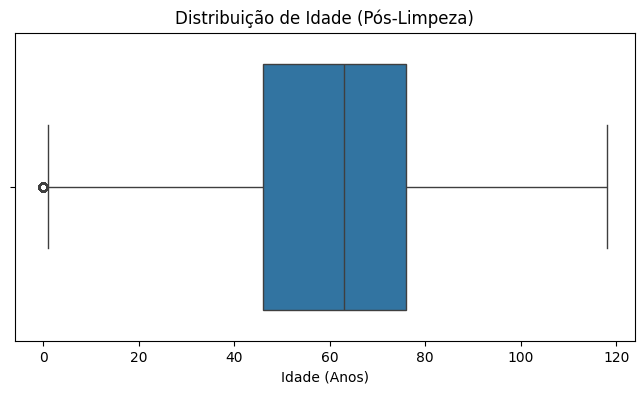

In [ ]:
# 1. Definir o limite biológico aceitável (120 anos)
LIMITE_IDADE = 120

# The function 'normalizar_idade' is defined in cell JfQ2XKFsJzxx and should be available.
# It needs to be applied to df_clean to create the 'IDADE_REAL_ANOS' column there.
df_clean['IDADE_REAL_ANOS'] = df_clean.apply(normalizar_idade, axis=1)

# 2. Contar quantos vamos perder
total_outliers = df_clean[df_clean['IDADE_REAL_ANOS'] > LIMITE_IDADE].shape[0]
print(f"Total de registros com idade impossível (> {LIMITE_IDADE} anos): {total_outliers}")

# 3. Filtrar o Dataset
# Mantemos apenas quem tem idade menor ou igual a 120
df_clean = df_clean[df_clean['IDADE_REAL_ANOS'] <= LIMITE_IDADE]

print("Outliers removidos com sucesso.")

# 4. Verificação visual pós-limpeza
import seaborn as sns
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plt.figure and plt.show

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['IDADE_REAL_ANOS'])
plt.title('Distribuição de Idade (Pós-Limpeza)')
plt.xlabel('Idade (Anos)')
plt.show()

Checagem de óbito por outras causas

In [ ]:
outras_causas = df[df['EVOLUCAO'].astype(str) == '3'].shape[0]
print(f"\nRegistros com 'Óbito por outras causas' (código 3): {outras_causas}")


Registros com 'Óbito por outras causas' (código 3): 79447


Tratamento dos óbitos por outras causas

In [ ]:
# 1. Verificar quantos temos antes
print(f"Registros antes da remoção de 'Óbito por outras causas': {len(df_clean)}")

# 2. Filtrar apenas Cura (1) e Óbito pelo agravo (2)
# O código 3 (Outras causas) e 9 (Ignorado) atrapalham a predição específica da doença.
# Nota: Garantimos que estamos pegando números ou strings para evitar erro de tipo
lista_manter = [1, 2, '1', '2', 1.0, 2.0]
df_clean = df_clean[df_clean['EVOLUCAO'].isin(lista_manter)]

print(f"Registros finais para o modelo (Apenas Cura ou Óbito SRAG): {len(df_clean)}")

# 3. Verificação
print("\nValores únicos restantes em EVOLUCAO:")
print(df_clean['EVOLUCAO'].unique())

Registros antes da remoção de 'Óbito por outras causas': 1412568
Registros finais para o modelo (Apenas Cura ou Óbito SRAG): 1351533

Valores únicos restantes em EVOLUCAO:
[1. 2.]


Anteriormente, as categorias (ASMA, EVOLUCAO, etc.) foram convertidas para string/object e os decimais foram removidos(.0).

O Estado Atual: Agora temos colunas com valores como '1', '2'.

O Problema: Modelos matemáticos (como Random Forest ou Regressão Logística) precisam de números, não textos. Além disso, para o Scikit-Learn, a variável alvo (EVOLUCAO) geralmente precisa ser binária (0 e 1), e não '1' e '2'.

Atualização Necessária: Antes de treinar, precisamos mapear esses valores.

Transformar EVOLUCAO: '1' (Cura) -> 0, '2' (Óbito) -> 1.

Transformar ASMA: '2' (Não) -> 0, '1' (Sim) -> 1.

In [ ]:
# Preparação final para o Modelo

# 1. Mapear alvo: Cura(1)=0, Óbito(2)=1
df_clean['ALVO'] = df_clean['EVOLUCAO'].map({'1.0': 0, '2.0': 1})

# 2. Mapear Asma: Não(2)=0, Sim(1)=1
df_clean['ASMA_BIN'] = df_clean['ASMA'].map({'2.0': 0, '1.0': 1})

# 3. Mapear Febre: Não(2)=0, Sim(1)=1
df_clean['FEBRE_BIN'] = df_clean['FEBRE'].map({'2.0': 0, '1.0': 1})

# 4. Mapear Dispneia: Não(2)=0, Sim(1)=1
df_clean['DISPNEIA_BIN'] = df_clean['DISPNEIA'].map({'2.0': 0, '1.0': 1})

# 5. Mapear Saturação: Não(2)=0, Sim(1)=1
df_clean['SATURACAO_BIN'] = df_clean['SATURACAO'].map({'2.0': 0, '1.0': 1})

# 6. Criar a coluna TEMPO_INTERNACAO (dias)
# Certificar que as colunas de data são do tipo datetime
df_clean['DT_INTERNA'] = pd.to_datetime(df_clean['DT_INTERNA'], errors='coerce')
df_clean['DT_ENCERRA'] = pd.to_datetime(df_clean['DT_ENCERRA'], errors='coerce')

# Calcular a diferença em dias
df_clean['TEMPO_INTERNACAO'] = (df_clean['DT_ENCERRA'] - df_clean['DT_INTERNA']).dt.days

# Limpar possíveis NaNs que surgiram na conversão ou cálculo de tempo de internação
df_clean.dropna(subset=['TEMPO_INTERNACAO'], inplace=True)

# Verificando as novas colunas
print(df_clean[['EVOLUCAO', 'ALVO', 'ASMA', 'ASMA_BIN', 'FEBRE', 'FEBRE_BIN', 'DISPNEIA', 'DISPNEIA_BIN', 'SATURACAO', 'SATURACAO_BIN', 'DT_INTERNA', 'DT_ENCERRA', 'TEMPO_INTERNACAO']].head())

    EVOLUCAO  ALVO  ASMA  ASMA_BIN  FEBRE  FEBRE_BIN  DISPNEIA  DISPNEIA_BIN  \
29       1.0   NaN   2.0       NaN    1.0        NaN       1.0           NaN   
42       1.0   NaN   2.0       NaN    1.0        NaN       1.0           NaN   
44       2.0   NaN   2.0       NaN    1.0        NaN       1.0           NaN   
48       1.0   NaN   2.0       NaN    1.0        NaN       1.0           NaN   
59       1.0   NaN   2.0       NaN    1.0        NaN       1.0           NaN   

    SATURACAO  SATURACAO_BIN DT_INTERNA DT_ENCERRA  TEMPO_INTERNACAO  
29        1.0            NaN 2019-01-18 2019-02-05              18.0  
42        1.0            NaN 2019-01-08 2019-02-14              37.0  
44        1.0            NaN 2019-01-13 2019-01-25              12.0  
48        1.0            NaN 2019-01-12 2019-02-04              23.0  
59        1.0            NaN 2019-01-10 2019-03-18              67.0  


Estatísticas relevantes

In [ ]:
import pandas as pd
import numpy as np

print("REPROCESSANDO VARIÁVEIS PARA GARANTIR OS DADOS")

# 1. GARANTIR QUE CLASSI_FIN SEJA NÚMERO
df_clean['CLASSI_FIN'] = pd.to_numeric(df_clean['CLASSI_FIN'], errors='coerce')

# 2. RECRIAR AS VARIÁVEIS BINÁRIAS (Garantia de Tipos)
# Mapeia ASMA: 1 (Sim) -> 1, 2 (Não) -> 0.
df_clean['ASMA_BIN'] = df_clean['ASMA'].astype(str).apply(lambda x: 1 if x in ['1', '1.0'] else 0)

# Mapeia FEBRE: 1 (Sim) -> 1, 2 (Não) -> 0
df_clean['FEBRE_BIN'] = df_clean['FEBRE'].astype(str).apply(lambda x: 1 if x in ['1', '1.0'] else 0)

# Mapeia ALVO (Óbito): 2 (Óbito) -> 1, 1 (Cura) -> 0
df_clean['ALVO'] = df_clean['EVOLUCAO'].astype(str).apply(lambda x: 1 if x in ['2', '2.0'] else 0)

# 3. FILTRAGEM DOS GRUPOS (MACRO-GRUPO VIRAL vs FANTASMA)
# Time Viral = Influenza (1) + Outros Vírus (2) + COVID (5)
codigos_viral = [1, 2, 5]
# Time Fantasma = SRAG Não Especificada (4)
codigos_srag_ne = [4]

# Filtra apenas esses casos (ignorando o código 3 - outros agentes)
df_stats = df_clean[df_clean['CLASSI_FIN'].isin(codigos_viral + codigos_srag_ne)].copy()

print(f"Total de casos filtrados para estatística: {len(df_stats)}")

# 4. CRIAÇÃO DOS RÓTULOS ATUALIZADOS
def rotular_grupo(valor):
    if valor in codigos_viral:
        return 'Viral Confirmado (COVID/Flu/Outros)'
    elif valor in codigos_srag_ne:
        return 'SRAG Não Especificada'
    else:
        return 'Outros'

df_stats['GRUPO'] = df_stats['CLASSI_FIN'].apply(rotular_grupo)
df_stats['ASMA_LABEL'] = df_stats['ASMA_BIN'].map({1: 'Asmático', 0: 'Não Asmático'})
df_stats['FEBRE_LABEL'] = df_stats['FEBRE_BIN'].map({1: 'Com Febre', 0: 'Sem Febre'})

# --- GERAÇÃO DAS TABELAS ---

print("\n>>> TABELA 1: PREVALÊNCIA DE ASMA (COMPARAÇÃO AMPLIADA) <<<")
tab_1 = pd.crosstab(df_stats['GRUPO'], df_stats['ASMA_LABEL'], normalize='index') * 100
display(tab_1.round(2))

print("\n>>> TABELA 2: SINTOMAS (FEBRE) EM ASMÁTICOS <<<")
asmaticos = df_stats[df_stats['ASMA_BIN'] == 1]
if len(asmaticos) > 0:
    tab_2 = pd.crosstab(asmaticos['GRUPO'], asmaticos['FEBRE_LABEL'], normalize='index') * 100
    display(tab_2.round(2))
else:
    print("Aviso: Nenhum asmático encontrado nos grupos filtrados.")

print("\n>>> TABELA 3: GRAVIDADE GERAL (IDADE, TEMPO, LETALIDADE) <<<")
# Recalcula tempo se necessário
if 'TEMPO_INTERNACAO' not in df_stats.columns:
    # Garante conversão de datas
    df_stats['DT_INTERNA'] = pd.to_datetime(df_stats['DT_INTERNA'], errors='coerce')
    df_stats['DT_ENCERRA'] = pd.to_datetime(df_stats['DT_ENCERRA'], errors='coerce')
    df_stats['TEMPO_INTERNACAO'] = (df_stats['DT_ENCERRA'] - df_stats['DT_INTERNA']).dt.days

resumo = df_stats.groupby(['GRUPO', 'ASMA_LABEL']).agg({
    'IDADE_REAL_ANOS': 'median',
    'TEMPO_INTERNACAO': 'median',
    'ALVO': 'mean'
}).round(4)

# Ajusta letalidade para %
resumo['ALVO'] = resumo['ALVO'] * 100
resumo = resumo.rename(columns={'ALVO': 'Letalidade (%)', 'IDADE_REAL_ANOS': 'Idade Mediana', 'TEMPO_INTERNACAO': 'Tempo Mediano (Dias)'})

display(resumo)

REPROCESSANDO VARIÁVEIS PARA GARANTIR OS DADOS
Total de casos filtrados para estatística: 1328131

>>> TABELA 1: PREVALÊNCIA DE ASMA (COMPARAÇÃO AMPLIADA) <<<


ASMA_LABEL,Asmático,Não Asmático
GRUPO,,
SRAG Não Especificada,17.09,82.91
Viral Confirmado (COVID/Flu/Outros),8.77,91.23



>>> TABELA 2: SINTOMAS (FEBRE) EM ASMÁTICOS <<<


FEBRE_LABEL,Com Febre,Sem Febre
GRUPO,,
SRAG Não Especificada,46.26,53.74
Viral Confirmado (COVID/Flu/Outros),57.43,42.57



>>> TABELA 3: GRAVIDADE GERAL (IDADE, TEMPO, LETALIDADE) <<<


Idade Mediana  \
GRUPO                               ASMA_LABEL                    
SRAG Não Especificada               Asmático               11.0   
                                    Não Asmático           66.0   
Viral Confirmado (COVID/Flu/Outros) Asmático               46.0   
                                    Não Asmático           64.0   

                                                  Tempo Mediano (Dias)  \
GRUPO                               ASMA_LABEL                           
SRAG Não Especificada               Asmático                      13.0   
                                    Não Asmático                  16.0   
Viral Confirmado (COVID/Flu/Outros) Asmático                      15.0   
                                    Não Asmático                  15.0   

                                                  Letalidade (%)  
GRUPO                               ASMA_LABEL                    
SRAG Não Especificada               Asmático                5.61  
                                    Não Asmático           20.29  
Viral Confirmado (COVID/Flu/Outros) Asmático               19.49  
                                    Não Asmático           35.86

Gráficos

/tmp/ipython-input-1625708159.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1625708159.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1625708159.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1625708159.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['Cura', 'Óbito'])


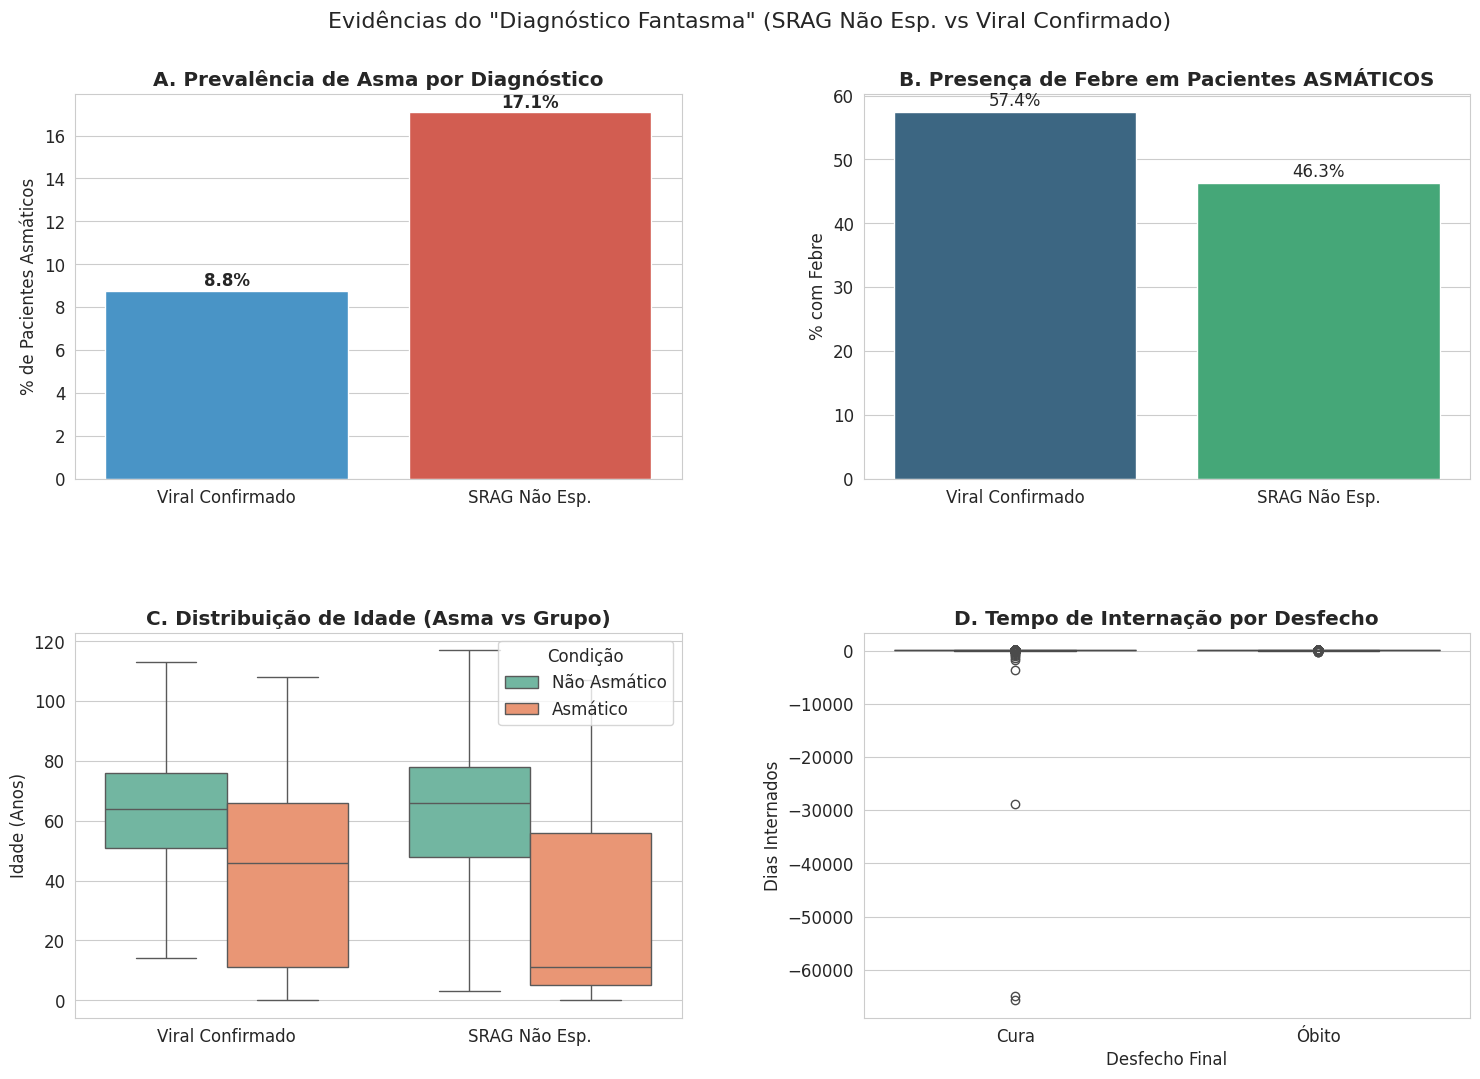

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIGURAÇÃO ESTÉTICA ---
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Recriando df_stats para o gráfico (caso tenha rodado separado)
# Time Viral = 1, 2, 5 vs Time Fantasma = 4
codigos_viral = [1, 2, 5]
codigos_srag_ne = [4]
df_stats = df_clean[df_clean['CLASSI_FIN'].isin(codigos_viral + codigos_srag_ne)].copy()

# Rótulos amigáveis para os gráficos
df_stats['GRUPO_GRAFICO'] = df_stats['CLASSI_FIN'].apply(
    lambda x: 'Viral Confirmado' if x in codigos_viral else 'SRAG Não Esp.'
)
df_stats['ASMA_GRAFICO'] = df_stats['ASMA_BIN'].map({1: 'Asmático', 0: 'Não Asmático'})
df_stats['FEBRE_GRAFICO'] = df_stats['FEBRE_BIN'].map({1: 'Com Febre', 0: 'Sem Febre'})
df_stats['DESFECHO_GRAFICO'] = df_stats['ALVO'].map({1: 'Óbito', 0: 'Cura'})

# Criar Figura com 4 Subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# --- GRÁFICO 1: A PROVA DO ENRIQUECIMENTO (Barplot) ---
prevalencia = df_stats.groupby('GRUPO_GRAFICO')['ASMA_BIN'].mean() * 100
# Ordenar para garantir consistência visual
ordem = ['Viral Confirmado', 'SRAG Não Esp.']
prevalencia = prevalencia.reindex(ordem)

sns.barplot(
    x=prevalencia.index,
    y=prevalencia.values,
    ax=axes[0, 0],
    palette=['#3498db', '#e74c3c']
)
axes[0, 0].set_title('A. Prevalência de Asma por Diagnóstico', fontweight='bold')
axes[0, 0].set_ylabel('% de Pacientes Asmáticos')
axes[0, 0].set_xlabel('')
for i, v in enumerate(prevalencia.values):
    axes[0, 0].text(i, v + 0.2, f'{v:.1f}%', ha='center', fontweight='bold')

# --- GRÁFICO 2: A ASSINATURA CLÍNICA (Barplot Agrupado) ---
asmaticos_plot = df_stats[df_stats['ASMA_BIN'] == 1]
febre_stats = asmaticos_plot.groupby('GRUPO_GRAFICO')['FEBRE_BIN'].mean() * 100
febre_stats = febre_stats.reindex(ordem)

sns.barplot(
    x=febre_stats.index,
    y=febre_stats.values,
    ax=axes[0, 1],
    palette='viridis'
)
axes[0, 1].set_title('B. Presença de Febre em Pacientes ASMÁTICOS', fontweight='bold')
axes[0, 1].set_ylabel('% com Febre')
axes[0, 1].set_xlabel('')
for i, v in enumerate(febre_stats.values):
    axes[0, 1].text(i, v + 1, f'{v:.1f}%', ha='center')

# --- GRÁFICO 3: PERFIL ETÁRIO (Boxplot) ---
sns.boxplot(
    data=df_stats,
    x='GRUPO_GRAFICO',
    y='IDADE_REAL_ANOS',
    hue='ASMA_GRAFICO',
    order=ordem,
    ax=axes[1, 0],
    palette='Set2',
    showfliers=False
)
axes[1, 0].set_title('C. Distribuição de Idade (Asma vs Grupo)', fontweight='bold')
axes[1, 0].set_ylabel('Idade (Anos)')
axes[1, 0].set_xlabel('')
axes[1, 0].legend(title='Condição', loc='upper right')

# --- GRÁFICO 4: TEMPO DE INTERNAÇÃO E DESFECHO (Boxplot) ---
sns.boxplot(
    data=df_clean[df_clean['TEMPO_INTERNACAO'] < 60],
    x='ALVO',
    y='TEMPO_INTERNACAO',
    ax=axes[1, 1],
    palette=['#2ecc71', '#e74c3c']
)
axes[1, 1].set_xticklabels(['Cura', 'Óbito'])
axes[1, 1].set_title('D. Tempo de Internação por Desfecho', fontweight='bold')
axes[1, 1].set_ylabel('Dias Internados')
axes[1, 1].set_xlabel('Desfecho Final')

# Título Geral
plt.suptitle('Evidências do "Diagnóstico Fantasma" (SRAG Não Esp. vs Viral Confirmado)', fontsize=16, y=0.95)
plt.show()

Feature engineering

In [ ]:
from sklearn.preprocessing import MinMaxScaler

print("INICIANDO FEATURE ENGINEERING")

# Garante que as colunas de data em df_clean sejam do tipo datetime antes de usá-las
df_clean['DT_NOTIFIC'] = pd.to_datetime(df_clean['DT_NOTIFIC'], errors='coerce')
df_clean['DT_SIN_PRI'] = pd.to_datetime(df_clean['DT_SIN_PRI'], errors='coerce')
df_clean['DT_INTERNA'] = pd.to_datetime(df_clean['DT_INTERNA'], errors='coerce')
df_clean['DT_ENCERRA'] = pd.to_datetime(df_clean['DT_ENCERRA'], errors='coerce')

# 1. CRIAÇÃO E TRANSFORMAÇÃO DE VARIÁVEIS
# Objetivo: Criar novas informações que ajudem o modelo a "pensar" melhor.

# A. Faixa Etária (Discretização)
# Como descobrimos que o fenômeno é pediátrico, criar faixas ajuda a Árvore a achar isso rápido.
# 0-12: Criança, 13-18: Adolescente, 19-59: Adulto, 60+: Idoso
bins = [-1, 12, 18, 59, 130]
labels = [0, 1, 2, 3] # 0=Criança, 1=Adolescente, 2=Adulto, 3=Idoso
df_clean['FAIXA_ETARIA'] = pd.cut(df_clean['IDADE_REAL_ANOS'], bins=bins, labels=labels)

# B. Tratamento de Datas (Sazonalidade)
# O mês pode influenciar (inverno tem mais SRAG). Vamos extrair o mês do sintoma.
df_clean['MES_SINTOMA'] = df_clean['DT_SIN_PRI'].dt.month

# 2. TRATAMENTO FINAL DE CATEGORIAS (ENCODING)
# Modelos matemáticos só aceitam números. Vamos transformar texto em número.

# A. Sexo (Binário)
# M = 0, F = 1. (Ignorados ou 'I' viram 0)
df_clean['SEXO_ENC'] = df_clean['CS_SEXO'].map({'M': 0, 'F': 1}).fillna(0)

# B. Variáveis Binárias de Risco e Sintomas
# Re-mapear DISPNEIA_BIN e SATURACAO_BIN para garantir que não tenham NaNs
# Os valores originais de DISPNEIA e SATURACAO são strings '1' ou '2' após cell 6AyOiXc6KC6M
df_clean['DISPNEIA_BIN'] = df_clean['DISPNEIA'].astype(str).apply(lambda x: 1 if x in ['1', '1.0'] else 0)
df_clean['SATURACAO_BIN'] = df_clean['SATURACAO'].astype(str).apply(lambda x: 1 if x in ['1', '1.0'] else 0)

# Garantir que sejam inteiros 0 ou 1
cols_binarias = ['ASMA_BIN', 'FEBRE_BIN', 'DISPNEIA_BIN', 'SATURACAO_BIN', 'ALVO']
for col in cols_binarias:
    df_clean[col] = df_clean[col].astype(int)

print("Categorias transformadas em números com sucesso.")

# 3. PADRONIZAÇÃO OU NORMALIZAÇÃO
# Objetivo: Colocar variáveis contínuas na mesma escala (entre 0 e 1).
# Obs: Para Árvores de Decisão isso não é obrigatório, mas é EXIGIDO para Redes Neurais e kNN.
# Vamos fazer para garantir que seus dados sirvam para qualquer modelo.

scaler = MinMaxScaler()
cols_continuas = ['IDADE_REAL_ANOS', 'TEMPO_INTERNACAO']

# Criamos novas colunas com o sufixo "_NORM"
df_clean[['IDADE_NORM', 'TEMPO_NORM']] = scaler.fit_transform(df_clean[cols_continuas])

print("Variáveis contínuas normalizadas (escala 0 a 1).")

# 4. SELEÇÃO DAS FEATURES RELEVANTES
# Aqui definimos o 'X' (o que o modelo usa para aprender) e o 'y' (o que ele deve prever)

# Lista final de colunas para o modelo
features_selecionadas = [
    'IDADE_NORM',       # Idade (Normalizada)
    'TEMPO_NORM',       # Tempo de Internação (Normalizada)
    'FAIXA_ETARIA',     # Faixa Etária (Categórica numérica)
    'SEXO_ENC',         # Sexo (Binário)
    'MES_SINTOMA',      # Sazonalidade (Numérico 1-12)
    'ASMA_BIN',         # Nossa variável de interesse principal
    'FEBRE_BIN',        # Assinatura clínica
    'DISPNEIA_BIN',     # Sintoma grave
    'SATURACAO_BIN'     # Sintoma grave
]

# Definindo X e y
X = df_clean[features_selecionadas]
y = df_clean['ALVO'] # 0=Cura, 1=Óbito

print("\nRESUMO DO DATASET FINAL PARA IA")
print(f"Número de Variáveis (Features): {len(features_selecionadas)}")
print(f"Lista de Variáveis: {features_selecionadas}")
print(f"Total de Pacientes (Linhas): {len(X)}")

# Visualizar como ficou o X
display(X.head())

INICIANDO FEATURE ENGINEERING
Categorias transformadas em números com sucesso.
Variáveis contínuas normalizadas (escala 0 a 1).

RESUMO DO DATASET FINAL PARA IA
Número de Variáveis (Features): 9
Lista de Variáveis: ['IDADE_NORM', 'TEMPO_NORM', 'FAIXA_ETARIA', 'SEXO_ENC', 'MES_SINTOMA', 'ASMA_BIN', 'FEBRE_BIN', 'DISPNEIA_BIN', 'SATURACAO_BIN']
Total de Pacientes (Linhas): 1336070


,IDADE_NORM,TEMPO_NORM,FAIXA_ETARIA,SEXO_ENC,MES_SINTOMA,ASMA_BIN,FEBRE_BIN,DISPNEIA_BIN,SATURACAO_BIN
29,0.330508,0.972562,2,0.0,1,0,1,1,1
42,0.711864,0.972843,3,0.0,1,0,1,1,1
44,0.322034,0.972474,2,1.0,1,0,1,1,1
48,0.491525,0.972636,2,0.0,1,0,1,1,1
59,0.000000,0.973287,0,1.0,1,0,1,1,1


Preparação do diagnóstico

In [ ]:
# --- BLOCO A: PREPARAÇÃO DE DADOS ENRIQUECIDA ---
import pandas as pd
import numpy as np
import random
from collections import Counter, defaultdict
from typing import List, Any, Dict, TypeVar, NamedTuple, Optional, Union

print("--- 1. PREPARAÇÃO DE DADOS (VERSÃO 2.0: NOVAS VARIÁVEIS) ---")

# 1. Filtros Iniciais (Viral vs Fantasma)
codigos_viral = [1, 2, 5]
codigos_fantasma = [4]

df_diag = df_clean[df_clean['CLASSI_FIN'].isin(codigos_viral + codigos_fantasma)].copy()
df_diag['ALVO_DIAGNOSTICO'] = df_diag['CLASSI_FIN'].apply(lambda x: 'Fantasma' if x in codigos_fantasma else 'Viral')

# 2. Balanceamento (50/50)
# Mantemos o balanceamento para o modelo não viciar no grupo majoritário
min_len = min(len(df_diag[df_diag['ALVO_DIAGNOSTICO']=='Viral']),
              len(df_diag[df_diag['ALVO_DIAGNOSTICO']=='Fantasma']))
tamanho_treino = min(min_len, 3000) # Aumentei um pouco a amostra

df_viral = df_diag[df_diag['ALVO_DIAGNOSTICO']=='Viral'].sample(tamanho_treino, random_state=42)
df_fantasma = df_diag[df_diag['ALVO_DIAGNOSTICO']=='Fantasma'].sample(tamanho_treino, random_state=42)
df_balanceado = pd.concat([df_viral, df_fantasma]).sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Dataset balanceado criado com {len(df_balanceado)} pacientes.")

# 3. NOVA ESTRUTURA DO PACIENTE (COM RAIO-X E TOSSE)
class PacienteDiag(NamedTuple):
    faixa_etaria: str
    asma: bool
    febre: bool
    dispneia: bool
    saturacao_baixa: bool
    tosse: bool           # NOVO!
    raio_x_anormal: bool  # NOVO!
    tempo_internacao: str # NOVO! (Categorico: Curta/Media/Longa)
    sexo: str
    resultado_final: str

# Função auxiliar para categorizar o tempo
def categorizar_tempo(dias):
    if pd.isna(dias): return 'Desconhecido'
    if dias < 5: return 'Curta'      # Infecção leve ou asma rápida
    if dias <= 14: return 'Media'    # Viral típico
    return 'Longa'                   # Complicação grave

# Mapeamentos
mapa_faixa = {0: 'Crianca', 1: 'Adolescente', 2: 'Adulto', 3: 'Idoso'}
mapa_bool = {0: False, 1: True} # 1=Sim, 0=Não (Baseado no seu tratamento anterior)
mapa_sexo = {0: 'M', 1: 'F'}

inputs_diagnostico = []

for row in df_balanceado.itertuples():
    # Lógica para Raio X: No SIVEP, geralmente 1=Normal, 2=Infiltrado, etc.
    # Vamos assumir que se não for 1 (Normal) e não for vazio, é Anormal.
    rx_anormal = False
    if hasattr(row, 'RAIOX_RES'):
        # Se for diferente de 1.0 (Normal) e não for 9 (Ignorado) ou vazio
        rx_anormal = (row.RAIOX_RES != 1.0 and row.RAIOX_RES not in [9.0, np.nan])

    p = PacienteDiag(
        faixa_etaria=mapa_faixa.get(row.FAIXA_ETARIA, 'Desc'),
        asma=mapa_bool.get(row.ASMA_BIN, False),
        febre=mapa_bool.get(row.FEBRE_BIN, False),
        dispneia=mapa_bool.get(row.DISPNEIA_BIN, False),
        saturacao_baixa=mapa_bool.get(row.SATURACAO_BIN, False),
        tosse=mapa_bool.get(getattr(row, 'TOSSE', 2.0) == 1.0, False), # Verifica se TOSSE=1
        raio_x_anormal=rx_anormal,
        tempo_internacao=categorizar_tempo(row.TEMPO_INTERNACAO),
        sexo=mapa_sexo.get(row.SEXO_ENC, 'I'),
        resultado_final=row.ALVO_DIAGNOSTICO
    )
    inputs_diagnostico.append(p)

print(f"Exemplo de Paciente Enriquecido: {inputs_diagnostico[0]}")

--- 1. PREPARAÇÃO DE DADOS (VERSÃO 2.0: NOVAS VARIÁVEIS) ---
Dataset balanceado criado com 6000 pacientes.
Exemplo de Paciente Enriquecido: PacienteDiag(faixa_etaria='Idoso', asma=False, febre=False, dispneia=False, saturacao_baixa=False, tosse=True, raio_x_anormal=True, tempo_internacao='Media', sexo='M', resultado_final='Viral')


Treinamento da árvore

In [ ]:
# --- BLOCO B: ALGORITMO NAIVE BAYES (DO ZERO) ---
import math
from collections import defaultdict, Counter
from typing import Set, NamedTuple, List, Tuple, Dict

print("--- 2. CONSTRUINDO O CLASSIFICADOR NAIVE BAYES ---")

# 1. Função de Tokenização (Transforma Paciente em "Palavras")
def tokenize(paciente: NamedTuple) -> Set[str]:
    """
    Converte os dados do paciente em um conjunto de 'tokens' (características).
    Isso adapta o algoritmo de texto do livro para dados clínicos.
    """
    tokens = set()

    # Adiciona tokens para características categóricas
    tokens.add(f"faixa_etaria:{paciente.faixa_etaria}")
    tokens.add(f"sexo:{paciente.sexo}")
    tokens.add(f"tempo:{paciente.tempo_internacao}")

    # Adiciona tokens apenas se o sintoma for Verdadeiro (igual palavras em um email)
    if paciente.asma: tokens.add("tem_asma")
    if paciente.febre: tokens.add("tem_febre")
    if paciente.dispneia: tokens.add("tem_dispneia")
    if paciente.saturacao_baixa: tokens.add("saturacao_baixa")
    if paciente.tosse: tokens.add("tem_tosse")
    if paciente.raio_x_anormal: tokens.add("raio_x_anormal")

    return tokens

# 2. A Classe do Algoritmo (Baseada no Capítulo de Naive Bayes)
class NaiveBayesClassifier:
    def __init__(self, k: float = 0.5):
        self.k = k  # Fator de suavização (smoothing) para evitar probabilidade zero
        self.tokens: Set[str] = set()
        self.token_counts: Dict[str, Dict[str, int]] = defaultdict(lambda: defaultdict(int))
        self.class_counts: Dict[str, int] = defaultdict(int)
        self.total_messages = 0

    def train(self, messages: List[Tuple[NamedTuple, str]]):
        """
        Treina o modelo contando quantos sintomas aparecem em cada diagnóstico.
        messages: Lista de tuplas (Paciente, 'Viral'/'Fantasma')
        """
        for paciente, label in messages:
            self.class_counts[label] += 1
            self.total_messages += 1

            # Pega os sintomas (tokens)
            tokens = tokenize(paciente)
            for token in tokens:
                self.tokens.add(token)
                self.token_counts[label][token] += 1

        print(f"Treinamento concluído. Vocabulário: {len(self.tokens)} sintomas únicos.")

    def _probabilities(self, token: str) -> Tuple[float, float]:
        """
        Calcula P(Sintoma | Fantasma) e P(Sintoma | Viral)
        """
        # Quantas vezes esse sintoma apareceu em Fantasmas?
        fantasma_count = self.token_counts['Fantasma'][token]
        # Quantas vezes apareceu em Virais?
        viral_count = self.token_counts['Viral'][token]

        # Total de pacientes em cada grupo
        fantasma_total = self.class_counts['Fantasma']
        viral_total = self.class_counts['Viral']

        # Aplica a fórmula com suavização (k)
        p_token_fantasma = (fantasma_count + self.k) / (fantasma_total + 2 * self.k)
        p_token_viral = (viral_count + self.k) / (viral_total + 2 * self.k)

        return p_token_fantasma, p_token_viral

    def predict(self, paciente: NamedTuple) -> str:
        """
        Retorna a classe com maior probabilidade posterior (Soma dos Logs).
        """
        tokens = tokenize(paciente)

        # Começamos com a probabilidade a priori (Prior)
        # Log odds inicial (assumindo balanceado 50/50, log(1) = 0, mas vamos calcular)
        # Se log_prob_score > 0 -> Fantasma, se < 0 -> Viral
        log_prob_fantasma = 0.0
        log_prob_viral = 0.0

        # Somamos os logs das probabilidades de cada sintoma
        for token in self.tokens:
            prob_if_fantasma, prob_if_viral = self._probabilities(token)

            if token in tokens:
                # Se o paciente TEM o sintoma, somamos log(P(S|Classe))
                log_prob_fantasma += math.log(prob_if_fantasma)
                log_prob_viral += math.log(prob_if_viral)
            else:
                # Se o paciente NÃO TEM, somamos log(1 - P(S|Classe))
                log_prob_fantasma += math.log(1.0 - prob_if_fantasma)
                log_prob_viral += math.log(1.0 - prob_if_viral)

        # Adiciona o prior da classe (caso não esteja perfeitamente balanceado)
        prob_class_fantasma = self.class_counts['Fantasma'] / self.total_messages
        prob_class_viral = self.class_counts['Viral'] / self.total_messages

        log_prob_fantasma += math.log(prob_class_fantasma)
        log_prob_viral += math.log(prob_class_viral)

        return 'Fantasma' if log_prob_fantasma > log_prob_viral else 'Viral'

print("✅ Classificador Naive Bayes definido!")

# --- BLOCO C: TREINAMENTO DO MODELO ---

print("--- INICIANDO TREINAMENTO NAIVE BAYES ---")

# 1. Preparar os dados no formato (Paciente, Label)
dados_treino = []
for p in inputs_diagnostico: # inputs_diagnostico vem do balanceamento
    dados_treino.append((p, p.resultado_final))

# 2. Instanciar e Treinar
modelo_nb = NaiveBayesClassifier(k=0.5)
modelo_nb.train(dados_treino)

print(f"Total de exemplos de treino: {modelo_nb.total_messages}")
print(f"Contagem por classe: {dict(modelo_nb.class_counts)}")

--- 2. CONSTRUINDO O CLASSIFICADOR NAIVE BAYES ---
✅ Classificador Naive Bayes definido!
--- INICIANDO TREINAMENTO NAIVE BAYES ---
Treinamento concluído. Vocabulário: 15 sintomas únicos.
Total de exemplos de treino: 6000
Contagem por classe: {'Viral': 3000, 'Fantasma': 3000}


Validação do modelo do diagnóstico

--- AVALIANDO O NAIVE BAYES ---

>>> RELATÓRIO DE CLASSIFICAÇÃO (NAIVE BAYES) <<<
              precision    recall  f1-score   support

    Fantasma       0.51      0.53      0.52       755
       Viral       0.71      0.69      0.70      1245

    accuracy                           0.63      2000
   macro avg       0.61      0.61      0.61      2000
weighted avg       0.63      0.63      0.63      2000



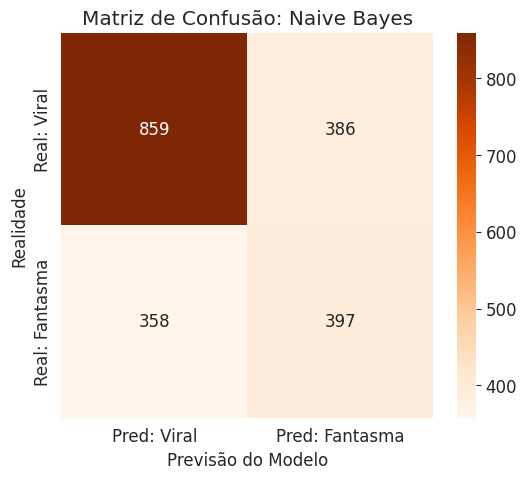

In [ ]:
# --- BLOCO D: VALIDAÇÃO DO NAIVE BAYES ---
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("--- AVALIANDO O NAIVE BAYES ---")

# 1. Gerar Teste (Dados novos e aleatórios)
teste_diag = df_diag.sample(2000, random_state=99).copy()
y_real = []
y_previsto = []

for row in teste_diag.itertuples():
    # Criação do paciente (Mesma lógica de antes)
    rx_anormal = False
    if hasattr(row, 'RAIOX_RES'):
        rx_anormal = (row.RAIOX_RES != 1.0 and row.RAIOX_RES not in [9.0, np.nan])

    p = PacienteDiag(
        faixa_etaria=mapa_faixa.get(row.FAIXA_ETARIA, 'Desc'),
        asma=mapa_bool.get(row.ASMA_BIN, False),
        febre=mapa_bool.get(row.FEBRE_BIN, False),
        dispneia=mapa_bool.get(row.DISPNEIA_BIN, False),
        saturacao_baixa=mapa_bool.get(row.SATURACAO_BIN, False),
        tosse=mapa_bool.get(getattr(row, 'TOSSE', 2.0) == 1.0, False),
        raio_x_anormal=rx_anormal,
        tempo_internacao=categorizar_tempo(row.TEMPO_INTERNACAO),
        sexo=mapa_sexo.get(row.SEXO_ENC, 'I'),
        resultado_final=row.ALVO_DIAGNOSTICO
    )

    # Previsão usando o Naive Bayes
    previsao = modelo_nb.predict(p)

    y_real.append(p.resultado_final)
    y_previsto.append(previsao)

# 2. Relatório
print("\n>>> RELATÓRIO DE CLASSIFICAÇÃO (NAIVE BAYES) <<<")
print(classification_report(y_real, y_previsto, target_names=['Fantasma', 'Viral']))

# 3. Matriz de Confusão
cm = confusion_matrix(y_real, y_previsto, labels=['Viral', 'Fantasma'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Pred: Viral', 'Pred: Fantasma'],
            yticklabels=['Real: Viral', 'Real: Fantasma'])
plt.title('Matriz de Confusão: Naive Bayes')
plt.ylabel('Realidade')
plt.xlabel('Previsão do Modelo')
plt.show()